In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## Scrape historic stock data

In [2]:
TD = yf.Ticker('TD.TO')
df = TD.history(start = "2001-01-02")
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2001-01-02,10.560736,10.621781,10.072378,10.072378,1909200,0.0,0.0
2001-01-03,10.072381,10.853754,10.035754,10.804918,7358000,0.0,0.0
2001-01-04,10.743875,11.012471,10.670621,10.951427,8923600,0.0,0.0
2001-01-05,10.951426,10.951426,10.548531,10.572948,4301800,0.0,0.0
2001-01-08,10.572948,10.719456,10.402022,10.536322,2391800,0.0,0.0
...,...,...,...,...,...,...,...
2021-06-22,87.800003,87.800003,86.800003,87.120003,5520000,0.0,0.0
2021-06-23,87.169998,87.169998,86.660004,87.000000,3224000,0.0,0.0
2021-06-24,87.279999,87.559998,86.970001,87.169998,2745300,0.0,0.0


In [3]:
# Drop unnecessary column
df = df.drop(['Dividends','Stock Splits'], axis = 1)

In [4]:
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2001-01-02,10.560736,10.621781,10.072378,10.072378,1909200
2001-01-03,10.072381,10.853754,10.035754,10.804918,7358000
2001-01-04,10.743875,11.012471,10.670621,10.951427,8923600
2001-01-05,10.951426,10.951426,10.548531,10.572948,4301800
2001-01-08,10.572948,10.719456,10.402022,10.536322,2391800


## Stock Price Analysis

Text(0.5, 1.0, 'TD Stock Price 01/02/2001 - 06/29/2021')

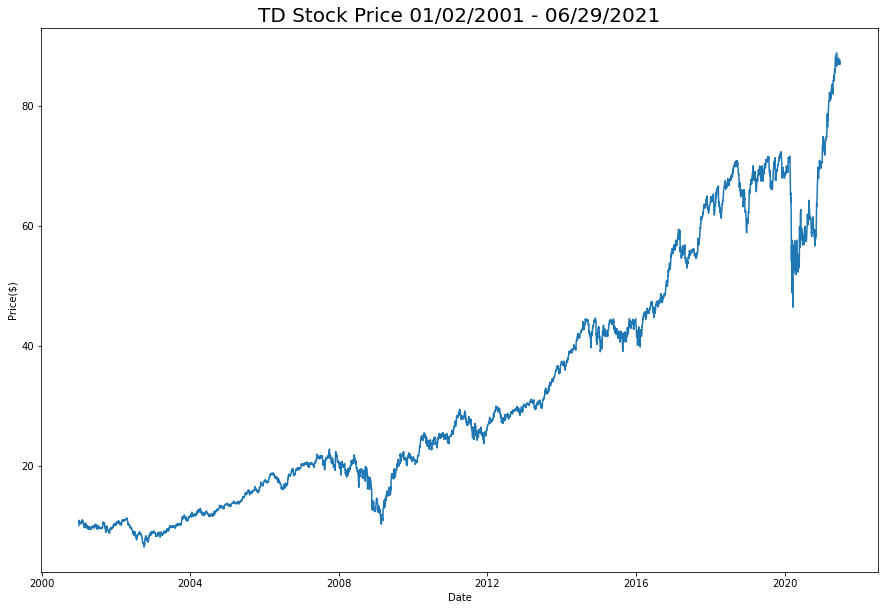

In [23]:
# Close Price Movement
plt.figure(figsize =(15,10))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price($)')
plt.title('TD Stock Price 01/02/2001 - 06/29/2021', fontsize =20)

## Feature Generation

In [47]:
## 31 new features
# 6 originial features
new_df = pd.DataFrame()
def generate_features(df):
    return(new_df)
new_df['open'] = df['Open']
new_df['open_1'] = df['Open'].shift(1)
new_df['high_1'] = df['High'].shift(1)
new_df['low_1'] = df['Low'].shift(1)
new_df['close_1'] = df['Close'].shift(1)
new_df['volume_1'] = df['Volume'].shift(1)

In [48]:
# Average closed price
new_df['avg_price_5'] = df['Close'].rolling(window=5).mean().shift(1)
new_df['avg_price_30'] = df['Close'].rolling(window=21).mean().shift(1)
new_df['avg_price_365'] = df['Close'].rolling(window=252).mean().shift(1)
new_df['ratio_avg_price_5_30'] = new_df['avg_price_5']/new_df['avg_price_30']
new_df['ratio_avg_price_5_365'] = new_df['avg_price_5']/new_df['avg_price_365']
new_df['ratio_avg_price_30_365'] = new_df['avg_price_30']/new_df['avg_price_365']

In [49]:
# Average volume
new_df['avg_vol_5'] = df['Volume'].rolling(window=5).mean().shift(1)
new_df['avg_vol_30'] = df['Volume'].rolling(window=21).mean().shift(1)
new_df['avg_vol_365'] = df['Volume'].rolling(window=252).mean().shift(1)
new_df['ratio_avg_vol_5_30'] = new_df['avg_vol_5']/new_df['avg_vol_30']
new_df['ratio_avg_vol_5_365'] = new_df['avg_vol_5']/new_df['avg_vol_365']
new_df['ratio_avg_vol_30_365'] = new_df['avg_vol_30']/new_df['avg_vol_365']

In [50]:
# Standard deviation of closed price
new_df['std_price_5'] = df['Close'].rolling(window=5).std().shift(1)
new_df['std_price_30'] = df['Close'].rolling(window=21).std().shift(1)
new_df['std_price_365'] = df['Close'].rolling(window=252).std().shift(1)
new_df['ratio_std_price_5_30'] = new_df['std_price_5']/new_df['std_price_30']
new_df['ratio_std_price_5_365'] = new_df['std_price_5']/new_df['std_price_365']
new_df['ratio_std_price_30_365'] = new_df['std_price_30']/new_df['std_price_365']

In [51]:
# Standard deviation of volumes
new_df['std_vol_5'] = df['Volume'].rolling(window=5).std().shift(1)
new_df['std_vol_30'] = df['Volume'].rolling(window=21).std().shift(1)
new_df['std_vol_365'] = df['Volume'].rolling(window=252).std().shift(1)
new_df['ratio_std_vol_5_30'] = new_df['std_vol_5']/new_df['std_vol_30']
new_df['ratio_std_vol_5_365'] = new_df['std_vol_5']/new_df['std_vol_365']
new_df['ratio_std_vol_30_365'] = new_df['std_vol_30']/new_df['std_vol_365']

In [52]:
# Return
new_df['return_1'] = ((df['Close']-df['Close'].shift(1))/df['Close'].shift(1)).shift(1)
new_df['return_5'] = ((df['Close']-df['Close'].shift(5))/df['Close'].shift(5)).shift(1)
new_df['return_30'] = ((df['Close']-df['Close'].shift(21))/df['Close'].shift(21)).shift(1)
new_df['return_365'] = ((df['Close']-df['Close'].shift(365))/df['Close'].shift(365)).shift(1)

In [53]:
# Moving average
new_df['moving_avg_5'] = new_df['return_1'].rolling(window=5).mean()
new_df['moving_avg_30'] = new_df['return_1'].rolling(window=21).mean()
new_df['moving_avg_365'] = new_df['return_1'].rolling(window=252).mean()

In [54]:
# target
new_df['close'] = df['Close']

In [55]:
new_df = generate_features(df)

In [56]:
new_df = new_df.dropna(axis=0)

In [61]:
new_df

,open,open_1,high_1,low_1,close_1,volume_1,avg_price_5,avg_price_30,avg_price_365,ratio_avg_price_5_30,...,ratio_std_vol_5_365,ratio_std_vol_30_365,return_1,return_5,return_30,return_365,moving_avg_5,moving_avg_30,moving_avg_365,close
Date,,,,,,,,,,,,,,,,,,,,,
2002-06-17,8.893187,8.880552,8.936134,8.804757,8.880552,11867000.0,9.062962,9.521674,10.085559,0.951824,...,1.700917,1.405191,-0.009580,-0.052561,-0.131884,-0.118326,-0.010712,-0.006636,-0.000486,9.011930
2002-06-18,9.055218,8.893187,9.027090,8.799708,9.011930,5526200.0,8.996770,9.469581,10.080503,0.950071,...,1.608967,1.396819,0.014794,-0.035424,-0.108250,-0.165942,-0.007107,-0.005356,-0.000427,8.861687
2002-06-19,8.810759,9.055218,9.055218,8.861687,8.861687,9321000.0,8.944994,9.426574,10.075833,0.948913,...,1.674185,1.415010,-0.016672,-0.028384,-0.092488,-0.190819,-0.005682,-0.004542,-0.000398,8.696169
2002-06-20,8.670702,8.810759,8.899886,8.683436,8.696169,5029600.0,8.883359,9.369671,10.071214,0.948097,...,1.551447,1.410105,-0.018678,-0.034226,-0.120813,-0.177508,-0.006869,-0.006048,-0.000401,8.721631
2002-06-21,8.708900,8.670702,8.912616,8.637597,8.721631,4922400.0,8.834394,9.324206,10.066823,0.947469,...,1.641164,1.339227,0.002928,-0.027304,-0.098669,-0.172232,-0.005442,-0.004875,-0.000377,8.645239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-22,87.800003,87.480003,87.809998,87.120003,87.559998,2542600.0,87.509998,87.558571,70.842159,0.999445,...,1.159016,0.782171,0.005397,0.007247,-0.003301,0.270505,0.001457,-0.000133,0.001615,87.120003
2021-06-23,87.169998,87.800003,87.800003,86.800003,87.120003,5520000.0,87.433998,87.511428,70.954507,0.999115,...,1.099061,0.796914,-0.005025,-0.004343,-0.011236,0.262911,-0.000860,-0.000513,0.001610,87.000000
2021-06-24,87.279999,87.169998,87.169998,86.660004,87.000000,3224000.0,87.265999,87.458095,71.067024,0.997804,...,1.148766,0.797755,-0.001377,-0.009563,-0.012710,0.264454,-0.001912,-0.000584,0.001616,87.169998


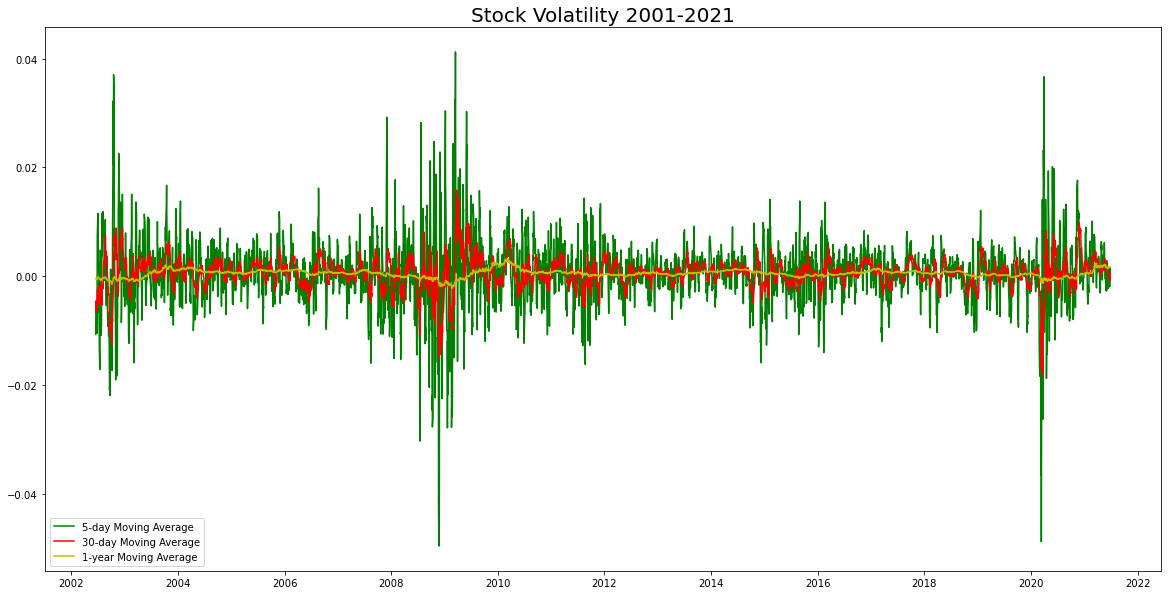

In [30]:
# TD Stock Volatility Visualization
plt.figure(figsize=(20,10))
plt.plot(new_df['moving_avg_5'],'g-', label ='5-day Moving Average')
plt.plot(new_df['moving_avg_30'],'r-', label = '30-day Moving Average')
plt.plot(new_df['moving_avg_365'], 'y-', label = '1-year Moving Average')
plt.title("Stock Volatility 2001-2021", fontsize = 20)
plt.legend()

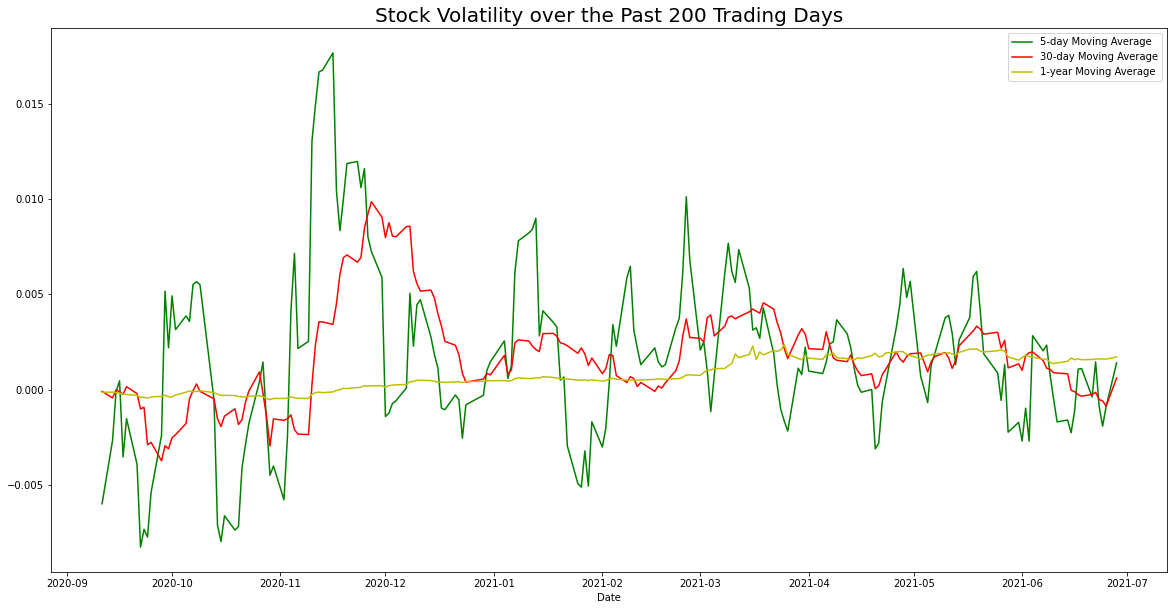

In [29]:
# Volatility in the past 200 trading days
plt.figure(figsize=(20,10))
plt.plot(new_df['moving_avg_5'].iloc[-200:],'g-', label ='5-day Moving Average')
plt.plot(new_df['moving_avg_30'].iloc[-200:],'r-', label = '30-day Moving Average')
plt.plot(new_df['moving_avg_365'].iloc[-200:], 'y-', label = '1-year Moving Average')
plt.title("Stock Volatility over the Past 200 Trading Days", fontsize = 20)
plt.xlabel("Date")
plt.legend()

## Linear Regression

### Train with Linear Regression

In [68]:
# Training Set
import datetime
start_training = datetime.date(2001,1,2)
end_training = datetime.date(2019,12,31)
features = new_df.drop(columns = ['close'],axis=1)
target = new_df['close']
X_train = features[start_training:end_training]
y_train = target[start_training:end_training]
X_train.shape

(4407, 37)

In [70]:
#Test Set
start_test = datetime.date(2020,1,2)
end_test = datetime.date(2021,6,29)
X_test = features[start_test:end_test]
y_test = target[start_test:end_test]
X_test.shape

(375, 37)

In [74]:
# Standardization (due to price and ratio being in different scale)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [75]:
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [93]:
# Apply Stochastic Gradient Descent to train
from sklearn.linear_model import SGDRegressor
regressor = SGDRegressor(loss = 'squared_loss', learning_rate = 'constant',  alpha = 0.0001, eta0 = 0.01, max_iter=1000)
regressor.fit(X_scaled_train, y_train)
predictions = regressor.predict(X_scaled_test)
predictions

array([67.87847107, 68.19412561, 68.12306283, 68.37396963, 68.31736211,
       68.83833189, 68.84280048, 68.68461904, 68.78475378, 68.54294786,
       68.84013606, 69.31023613, 69.58306631, 69.66139332, 69.51629463,
       69.60697129, 69.69092726, 69.64045859, 69.40471707, 69.75333076,
       69.65601055, 69.30673885, 68.9494967 , 69.12519626, 70.1118244 ,
       70.76612286, 71.02966402, 71.07065843, 71.0699306 , 71.22745806,
       70.9892626 , 70.60480877, 70.71877924, 70.82309239, 71.03853028,
       71.33904047, 70.97086391, 70.24512369, 69.46658174, 68.63478624,
       66.14448555, 64.79166107, 65.05174833, 64.19485106, 63.77112596,
       62.53392001, 60.00854306, 54.72871977, 55.72613208, 52.82786896,
       48.5057146 , 52.50830364, 49.55223374, 51.40840698, 48.65202956,
       49.72761597, 49.14704215, 46.4608381 , 50.72292594, 53.56070391,
       53.70545837, 51.62234103, 53.49042212, 54.29585967, 52.43656733,
       52.55726898, 51.91174402, 54.58462586, 55.55654359, 55.74

### Evaluation

In [94]:
print('Training set score:{:.2f}'.format(regressor.score(X_scaled_train, y_train)))
print('Test set score:{:.2f}'.format(regressor.score(X_scaled_test, y_test)))

Training set score:1.00
Test set score:0.99


### Plotting the Prediction